In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

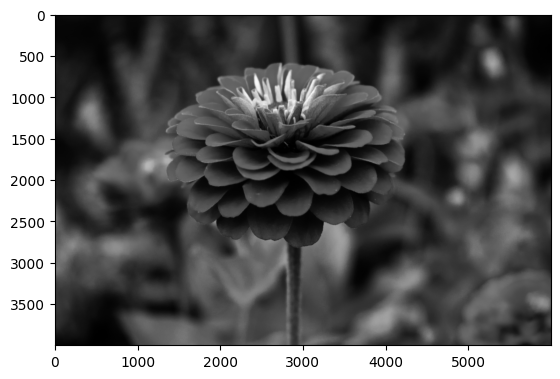

In [7]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")
plt.show()

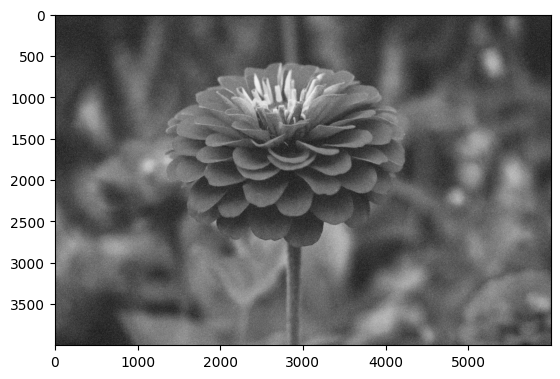

In [8]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray,noise_gauss, cv2.COLOR_BGR2GRAY)
plt.imshow(image_noise_gauss, cmap = "gray")

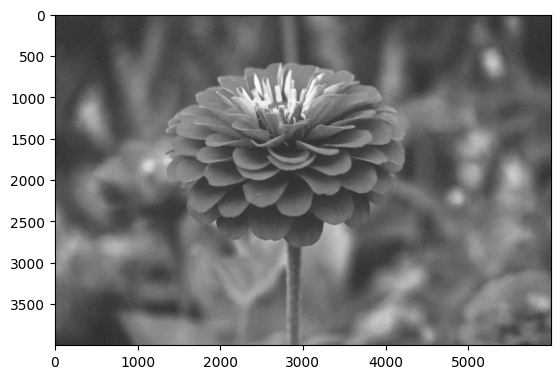

In [9]:
uniform_noise = np.random.randint(0, 100, image_gray.shape).astype("uint8")
image_noise_uniform = cv2.add(image_gray, uniform_noise, cv2.COLOR_BGR2GRAY)
plt.imshow(image_noise_uniform, cmap = "gray")

In [10]:
from skimage.metrics import structural_similarity, mean_squared_error

def get_res(filter_img) -> list:
    if len(filter_img.shape) == 3:
        filter_gray = cv2.cvtColor(filter_img, cv2.COLOR_BGR2GRAY)
    else:
        filter_gray = filter_img
    
    mse_value = mean_squared_error(image_gray, filter_gray)
    ssim_value, _ = structural_similarity(image_gray, filter_gray, full=True)
    
    return [mse_value, ssim_value]

image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss, (3,3), 0)
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
image_gauss_fastNl = cv2.fastNlMeansDenoising(image_noise_gauss, h=25, templateWindowSize=3)

images = {
    'Медианный': image_gauss_median, 
    'Гаусcа': image_gauss_gauss, 
    'Билатериальный': image_gauss_bilat, 
    'Cредних': image_gauss_fastNl
}


images_place = sorted(((k, get_res(v)) for k, v in images.items()), key=lambda x: x[1][1], reverse=True)

print("Результаты для гауссовского шума:")
for i, k in enumerate(images_place, 1):
    print(f'{i}: {k[0]}, MSE {k[1][0]}, SSIM {k[1][1]}')

image_uniform_median = cv2.medianBlur(image_noise_uniform, 3)
image_uniform_gauss = cv2.GaussianBlur(image_noise_uniform, (3,3), 0)
image_uniform_bilat = cv2.bilateralFilter(image_noise_uniform, 9, 75, 75)
image_uniform_fastNl = cv2.fastNlMeansDenoising(image_noise_uniform, h=25, templateWindowSize=5)

images_uniform = {
    'Медианный': image_uniform_median, 
    'Гаусcа': image_uniform_gauss, 
    'Билатериальный': image_uniform_bilat, 
    'Cредних': image_uniform_fastNl
}

images_place_uniform = sorted(((k, get_res(v)) for k, v in images_uniform.items()), key=lambda x: x[1][1], reverse=True)

print("Результаты для равномерного шума:")
for i, k in enumerate(images_place_uniform, 1):
    print(f'{i}: {k[0]}, MSE {k[1][0]}, SSIM {k[1][1]}')

Результаты для гауссовского шума:
1: Медианный, MSE 845.042287625, SSIM 0.1535513457055012
2: Гаусcа, MSE 1928.1688106666666, SSIM 0.14142599932055655
3: Билатериальный, MSE 1788.7017316666668, SSIM 0.10453307792372919
4: Cредних, MSE 3340.5140013333335, SSIM 0.04016883285820789
Результаты для равномерного шума:
1: Cредних, MSE 2472.408284041667, SSIM 0.5398307980709282
2: Билатериальный, MSE 2489.6326305416665, SSIM 0.4832026092940914
3: Гаусcа, MSE 2569.918822291667, SSIM 0.30275330336336564
4: Медианный, MSE 2679.658848833333, SSIM 0.195104797583974
